# Randomized Image Sampling for Explanations (RISE)

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm

## Change code below to incorporate your *model* and *input processing*

### Define your model here:

In [3]:
import numpy as np
import cv2
from scene_network_alexnet import alexnet_siamese as scene_network
scene_model = scene_network()

In [4]:
class Model():
    def __init__(self):
        self.model = torch.load("overfitted_scene_network.pth.tar",map_location=torch.device('cpu'))
        self.input_size = (480, 480)
        self.model.eval()
        
    def run_model(self, uav_input,sat_input):
        return self.model(uav_input.unsqueeze(0),sat_input.unsqueeze(0))

### Load and preprocess image

In [5]:
def load_img(path):
    img = cv2.imread(path)
    # img = cv2.resize(img,(224,224))
    # x = np.expand_dims(img,0)
    return img

---

## RISE

In [6]:
def generate_masks(N, s, p1):
    cell_size = np.ceil(np.array(model.input_size) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *model.input_size))

    for i in tqdm(range(N), desc='Generating masks'):
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + model.input_size[0], y:y + model.input_size[1]]
    masks = masks.reshape(-1, *model.input_size, 1)
    return masks

In [28]:
from torchvision import datasets, models, transforms
import torch
from PIL import Image
to_tensor = transforms.ToTensor()

def explain(model, uav_img, sat_img, masks):
    preds = []

    sat_img = Image.fromarray(sat_img).convert("RGB")
    sat_img = to_tensor(sat_img)

    # Make sure multiplication is being done for correct axes
    for i in tqdm(range(0, N), desc='Explaining'):
        masked = np.zeros_like(uav_img)

        for j in range(len(uav_img.T)):
                masked.T[j] = uav_img.T[j]*masks[i].squeeze()

        masked = to_tensor(masked)

        preds.append(model.run_model(masked,sat_img).item())

    preds_unchanged = np.array(preds)
    preds = 1-((preds_unchanged)/np.max(preds_unchanged))
    sal = preds.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)[0]
    sal = sal / N / p1
    return sal,preds_unchanged

---

## Running explanations

In [8]:
model = Model()

In [15]:
img = load_img("D:\Shetty_data\\train\\atlanta\\uav\\uav1.png")
img2 = load_img("D:\Shetty_data\\train\\atlanta\\sat300\sat1.png")

In [41]:
N = 10
s = 8
p1 = 0.5
masks = generate_masks(N, s, p1)

Generating masks: 100%|██████████| 10/10 [00:00<00:00, 59.87it/s]


In [36]:
sal,preds = explain(model, img,img2, masks)

Explaining: 100%|██████████| 1000/1000 [02:27<00:00,  6.79it/s]


In [37]:
print(preds)

[11.29272079 11.65557861 10.52826118 11.65637016 11.47728348 11.73583889
 10.93728352 10.41940689 11.27827168 10.29335117 10.60416794 10.93732166
 10.75794506  9.82432556 11.71387005 11.19524956 10.77365303 10.52115536
 10.38555241  9.93189621 10.30389023 10.46868229 10.7712059  10.14203835
 11.64002419 10.76065826 11.74337769 10.59820747 10.10125065  9.20296097
 11.43923664 11.29319572 11.33063793 10.34090042 11.45194817  8.95327854
 10.44771671 10.12643623 10.81520844 10.56001949 11.50553894 12.05890274
 11.22220421 10.25936317 11.05909729 11.30033875 12.71546936 10.37122536
 10.31609535 10.39726925 11.95148849 11.39544678 12.39465332  9.86625767
 10.44409943 11.77793312 12.24476337 11.76846981 11.25915432 10.44422626
  9.22174835 12.04012108 11.50774193 10.48685646 11.34204102 11.60085487
 10.36852741 11.87329769 10.86534977 11.1781168  12.26550961 10.6102314
 11.77252293  9.67124176 10.84373474  9.92498112 10.32577801 10.85922909
  9.66267395 11.37406445  9.94090748 10.87448502 10.

In [29]:
sal2,preds2 = explain(model, img2,img, masks)

Explaining: 100%|██████████| 1000/1000 [02:30<00:00,  6.63it/s]


In [30]:
print(preds2)

[44.44017792 44.2824173  44.324543   43.17508698 43.17708969 44.11361313
 43.39998627 44.13866043 44.87337112 43.88990784 44.67476273 43.7978096
 43.20975494 44.21879578 44.00143051 44.62524033 43.32687759 44.71475983
 43.39676666 43.55729675 44.30309296 43.46533203 43.10977936 43.60786057
 44.69675827 44.20600128 43.76545334 43.26691055 43.4301796  43.09246063
 43.34473419 43.40367889 44.44212341 43.84810638 44.4362793  44.27032852
 43.93338776 43.44999313 42.92892075 43.36958313 43.28442383 43.6859436
 44.18247604 43.98233414 44.3372612  43.79869461 43.49538803 43.53836441
 42.98498917 43.94775772 43.22806931 42.76889038 43.63787842 44.83594131
 43.26753235 43.44312668 44.10609436 44.10779572 44.18413925 44.1225853
 43.80450058 43.14138031 44.6002121  43.50273132 43.35689926 45.10559845
 43.75788498 43.99309921 44.04179382 44.15014648 43.13235092 44.20679092
 43.19973755 43.26373291 43.70497894 44.38628387 43.01177216 43.9954834
 43.66542053 43.70943832 44.03676605 43.84370422 43.884

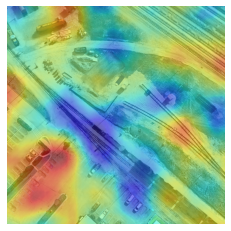

In [24]:
plt.axis('off')
plt.imshow(img)
plt.imshow(sal, cmap='jet', alpha=0.5)
plt.show()

# plt.axis('off')
# plt.imshow(img2)
# plt.imshow(sal2, cmap='jet', alpha=0.5)
# plt.show()